# Continuous Control

---

Congratulations for completing the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program!  In this notebook, you will learn how to control an agent in a more challenging environment, where the goal is to train a creature with four arms to walk forward.  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.registry import default_registry
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Crawler.app"`
- **Windows** (x86): `"path/to/Crawler_Windows_x86/Crawler.exe"`
- **Windows** (x86_64): `"path/to/Crawler_Windows_x86_64/Crawler.exe"`
- **Linux** (x86): `"path/to/Crawler_Linux/Crawler.x86"`
- **Linux** (x86_64): `"path/to/Crawler_Linux/Crawler.x86_64"`
- **Linux** (x86, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86"`
- **Linux** (x86_64, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86_64"`

For instance, if you are using a Mac, then you downloaded `Crawler.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Crawler.app")
```

In [2]:
# env = UnityEnvironment(file_name='./Crawler_Linux/Crawler.x86_64')
# env = UnityEnvironment(file_name='/home/luis-ferro/test/unity-mlagents/Playground/Builds/Crawler.x86_64')
env = default_registry['CrawlerStaticTarget'].make()
env.reset()

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
behavior_name = list(env.behavior_specs)[0]
behavior_spec = env.behavior_specs[behavior_name]
behavior_spec

BehaviorSpec(observation_specs=[ObservationSpec(shape=(126,), dimension_property=(<DimensionProperty.UNSPECIFIED: 0>,), observation_type=<ObservationType.DEFAULT: 0>, name='')], action_spec=ActionSpec(continuous_size=20, discrete_branches=()))

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# Reset the Environment
env.reset()
behavior_spec = env.behavior_specs[behavior_name]

# Number of agents
decision_steps, terminal_steps = env.get_steps(behavior_name)
num_agents = len(decision_steps)
print(f"Number of agents: {num_agents}")

# Size of each action
action_size = behavior_spec.action_spec.continuous_size
print(f"Size of each action: {action_size}")

# Examine the state space
obs_specs = behavior_spec.observation_specs
num_obs = len(obs_specs)
state_size = obs_specs[0].shape
print(f"Number of observations: {num_obs}")
print(f"Observation space: {state_size}")
print(f"There are {num_agents} agents. Each observes a state with length: {state_size}")
print("The state if the first agent looks like: \n", decision_steps[0])

Number of agents: 10
Size of each action: 20
Number of observations: 1
Observation space: (126,)
There are 10 agents. Each observes a state with length: (126,)
The state if the first agent looks like: 
 DecisionStep(obs=[array([ 2.23314381e+00, -4.84332941e-06, -1.58468087e-03,  9.99998748e-01,
        1.82739994e-03,  9.99997020e-01,  1.58468715e-03,  0.00000000e+00,
        1.97230140e-03, -8.02114546e-01, -7.38730247e-04,  6.27081096e-03,
       -1.73478911e-04, -5.99831901e-02,  0.00000000e+00,  7.90174527e-04,
        2.32891345e+00, -6.44181902e-03,  4.62260628e+00, -4.83294111e-03,
        4.55721331e+00,  6.06272042e-01, -1.01876810e-01, -6.06312096e-01,
        5.00000000e-01,  5.00000000e-01,  0.00000000e+00,  5.00000000e-01,
        0.00000000e+00,  2.69338069e-03, -4.18881607e+00, -1.38688181e-02,
       -6.89159584e+00,  7.84981530e-03, -6.96384573e+00,  1.33428073e+00,
       -1.64174810e-01, -1.33400917e+00,  5.00000000e-01,  0.00000000e+00,
        0.00000000e+00,  5.00

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env.reset()
behavior_name = list(env.behavior_specs)[0]
behavior_spec = env.behavior_specs[behavior_name]
ds, ts = env.get_steps(behavior_name)
states = ds.obs[0]
scores = np.zeros(num_agents)
dones = np.zeros(num_agents)
while True:
    # Select random action for each agent
    action = behavior_spec.action_spec.random_action(num_agents)
    # Set the actions
    env.set_actions(behavior_name, action)
    # Move the simulation one step ahead
    env.step()
    # Get the s,a,r,ns tuple
    ds, ts = env.get_steps(behavior_name)
    if len(ts) > 0:
        for agent_id in ts:
            scores[agent_id] += ts[agent_id].reward
            dones[agent_id] = 1
        break
    next_states = ds.obs[0]
    scores += ds.reward
    states = next_states

print(f"Total score (averaged over agents) this episode: {np.mean(scores)}")

Total score (averaged over agents) this episode: 0.3416879654861987


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, layer_units=[512, 256, 128]):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.layer_units = layer_units

        for i in range(len(layer_units)):
            layer_name = f'fc{i+1}'
            units = layer_units[i]
            if i == 0:
                self.__setattr__(layer_name, nn.Linear(state_size, units))
            else:
                prev_units = layer_units[i-1]
                self.__setattr__(layer_name, nn.Linear(prev_units, units))

        prev_units = layer_units[-1]
        self.__setattr__(f'fc{len(layer_units) + 1}', nn.Linear(prev_units, action_size))

        self.reset_parameters()

    def reset_parameters(self):
        for i in range(len(self.layer_units)):
            layer_name = f'fc{i+1}'
            layer = self.__getattr__(layer_name)            
            layer.weight.data.uniform_(*hidden_init(layer))

        last_layer_name = f'fc{len(self.layer_units) + 1}'
        layer = self.__getattr__(last_layer_name)
        layer.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        for i in range(len(self.layer_units)):
            layer_name = f'fc{i+1}'
            layer = self.__getattr__(layer_name)
            if i == 0:
                x = torch.relu(layer(state))
            else:
                x = torch.relu(layer(x))

        last_layer_name = f'fc{len(self.layer_units) + 1}'
        layer = self.__getattr__(last_layer_name)
        return torch.tanh(layer(x))
        


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, layer_units=[512, 256, 128]):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.layer_units = layer_units

        for i in range(len(layer_units)):
            layer_name = f'fc{i+1}'
            units = layer_units[i]
            if i == 0:
                self.__setattr__(layer_name, nn.Linear(state_size, units))
            elif i == 1:
                prev_units = layer_units[i-1]
                self.__setattr__(layer_name, nn.Linear(prev_units + action_size, units))            
            else:
                prev_units = layer_units[i-1]
                self.__setattr__(layer_name, nn.Linear(prev_units, units))

        prev_units = layer_units[-1]
        self.__setattr__(f'fc{len(layer_units) + 1}', nn.Linear(prev_units, 1))
        
        self.reset_parameters()

    def reset_parameters(self):
        for i in range(len(self.layer_units)):
            layer_name = f'fc{i+1}'
            layer = self.__getattr__(layer_name)            
            layer.weight.data.uniform_(*hidden_init(layer))

        last_layer_name = f'fc{len(self.layer_units) + 1}'
        layer = self.__getattr__(last_layer_name)
        layer.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        for i in range(len(self.layer_units)):
            layer_name = f'fc{i+1}'
            layer = self.__getattr__(layer_name)
            if i == 0:
                xs = torch.relu(layer(state))
                x = torch.cat((xs, action), dim=1)
            else:
                x = torch.relu(layer(x))

        last_layer_name = f'fc{len(self.layer_units) + 1}'
        layer = self.__getattr__(last_layer_name)
        return layer(x)

In [8]:
# https://github.com/rlcode/per.git
class SumTree:
    write = 0 
    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = np.zeros(2 * capacity - 1)
        self.data = np.zeros(capacity, dtype=object)
        self.n_entries = 0

    def _propagate(self, idx, change):
        parent = (idx - 1) // 2
        self.tree[parent] += change

        if parent != 0:
            self._propagate(parent, change)

    def _retrieve(self, idx, s):
        left = 2 * idx + 1
        right = left + 1

        if left >= len(self.tree):
            return idx
        
        if s <= self.tree[left]:
            return self._retrieve(left, s)
        else:
            return self._retrieve(right, s - self.tree[left])
    
    def total(self):
        return self.tree[0]

    def add(self, p, data):
        idx = self.write + self.capacity - 1

        self.data[self.write] = data
        self.update(idx, p)

        self.write += 1
        if self.write >= self.capacity:
            self.write = 0
        
        if self.n_entries < self.capacity:
            self.n_entries += 1

    def update(self, idx, p):
        change = p - self.tree[idx]

        self.tree[idx] = p
        self._propagate(idx, change)

    def get(self, s):
        idx = self._retrieve(0, s)
        dataIdx = idx - self.capacity + 1

        return (idx, self.tree[idx], self.data[dataIdx])



In [9]:
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, buffer_size, batch_size, seed, device, e: float = 0.01, a: float = 0.6, beta: float = 0.4, beta_increment_per_sampling = 1e-3):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.e = e
        self.a = a
        self.beta = beta
        self.beta_increment_per_sampling = beta_increment_per_sampling

        self.tree = SumTree(buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        self.device = device

    def _get_priority(self, error):
        return (np.abs(error) + self.e) ** self.a
    
    def add(self, error, sample):
        """Add a new experience to memory."""
        state, action, reward, next_state, done = sample
        e = self.experience(state, action, reward, next_state, done)
        p = self._get_priority(error)
        self.tree.add(p, e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = []
        idxs = []
        segment = self.tree.total() / self.batch_size
        priorities = []

        self.beta = np.min([1., self.beta + self.beta_increment_per_sampling])

        i = 0
        while i < self.batch_size:
            a = segment * i
            b = segment * (i + 1)

            s = random.uniform(a, b)
            idx, p, data = self.tree.get(s)
            if not isinstance(data, tuple):
                continue
            priorities.append(p)
            experiences.append(data)
            idxs.append(idx)
            i += 1

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(self.device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(self.device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(self.device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(self.device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(self.device)

        sampling_probabilities = priorities / self.tree.total()
        is_weight = np.power(self.tree.n_entries * sampling_probabilities, -self.beta)
        is_weight /= is_weight.max()

        return (states, actions, rewards, next_states, dones), idxs, is_weight

    
    def update(self, idx, error):
        p = self._get_priority(error)
        self.tree.update(idx, p)

    def __len__(self):
        """Return the current size of internal memory."""
        return self.tree.n_entries

In [10]:
class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.1, scale=1.0, scale_decay=1.0):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.initial_scale = scale
        self.scale = scale
        self.scale_decay = scale_decay
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)
        self.scale = self.initial_scale

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        # dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(len(x))
        self.state = x + dx
        scale = self.scale
        self.scale *= self.scale_decay
        return self.state * scale

In [11]:
import numpy as np
import random
import copy
from collections import namedtuple, deque

import torch
import torch.nn.functional as F
import torch.optim as optim

class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(
        self, 
        state_size: int, 
        action_size: int, 
        random_seed: int,
        buffer_size: int=int(1e5),
        batch_size: int=128,
        gamma: float=0.99,
        tau: float=1e-3,
        lr_actor: float=1e-4,
        lr_critic: float=1e-3,
        weight_decay: float=0.0,
        noise_scale: float=1.0,
        noise_decay: float=1.0, 
        device: str="cpu"
        ):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau
        self.device = device

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=lr_actor)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=lr_critic, weight_decay=weight_decay)
        
        self.clone_weights(self.actor_target, self.actor_local) # ADDED
        self.clone_weights(self.critic_target, self.critic_local) # ADDED

        # Noise process
        self.noise = OUNoise(action_size, random_seed, scale=noise_scale, scale_decay=noise_decay)

        # Replay memory
        self.memory = ReplayBuffer(buffer_size, batch_size, random_seed, device)

    def clone_weights(self, w1, w0): # ADDED
        for p1, p0 in zip(w1.parameters(), w0.parameters()):
            p1.data.copy_(p0.data)
    
    def step(self, state, action, reward, next_state, done):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        s = torch.from_numpy(state).float().to(self.device)
        ns = torch.from_numpy(next_state).float().to(self.device)
        r = torch.from_numpy(reward).float().to(self.device)
        d = torch.from_numpy(done).float().to(self.device)

        with torch.no_grad():
            oan = self.actor_local(ns)
            oqtn = self.critic_local(ns, oan)
            oqt = reward + (self.gamma * oqtn.cpu().numpy() * (1 - done))

            an = self.actor_target(ns)
            qtn = self.critic_target(ns, an)
            qt = reward + (self.gamma * qtn.cpu().numpy() * (1 - done))

        errors = np.abs(oqt - qt)
        if len(errors) > 1:
            errors = errors.squeeze()

        for i, error in enumerate(errors):
            self.memory.add(error, (state[i], action[i], reward[i], next_state[i], done[i]))

        # Learn, if enough samples are available in memory
        if len(self.memory) > self.batch_size:
            experiences, idxs, is_weights = self.memory.sample()
            self.learn(experiences, idxs, is_weights)

    def act(self, state, add_noise=True, clip=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(self.device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        if clip:
            return np.clip(action, -1, 1)
        else:
            return action

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, idxs, is_weights):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (self.gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # update experience priorities
        errors = torch.abs(Q_expected - Q_targets).cpu().detach().numpy()
        # print(f"errors: {errors.shape}, idxs: {len(idxs)}")
        for i in range(self.batch_size):
            idx = idxs[i]
            self.memory.update(idx, errors[i])

        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        # torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1) # ADDED
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, self.tau)
        self.soft_update(self.actor_local, self.actor_target, self.tau)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

    def save(self, path :str) -> None:
        if not os.path.exists(path):
            os.makedirs(path)
        torch.save(self.actor_local.state_dict(), f'{path}/crawler-checkpoint_actor.pth')
        torch.save(self.critic_local.state_dict(), f'{path}/crawler-checkpoint_critic.pth')
        torch.save(self.actor_target.state_dict(), f'{path}/crawler-checkpoint_actor_target.pth')
        torch.save(self.critic_target.state_dict(), f'{path}/crawler-checkpoint_critic_target.pth')

    def load(self, path: str) -> None:
        self.actor_local.load_state_dict(torch.load(f'{path}/crawler-checkpoint_actor.pth'))
        self.actor_target.load_state_dict(torch.load(f'{path}/crawler-checkpoint_actor_target.pth'))
        self.critic_local.load_state_dict(torch.load(f'{path}/crawler-checkpoint_critic.pth'))
        self.critic_target.load_state_dict(torch.load(f'{path}/crawler-checkpoint_critic_target.pth'))
        

In [12]:
from tqdm import tqdm
from mlagents_envs.environment import ActionTuple

def ddpg(
    agent,
    env,
    n_episodes=1000, 
    max_t=300,
    save_dir=None,
    ):
    scores_window = deque(maxlen=100)
    scores = []
    avg_scores = []
    solved = False
    with tqdm(total=n_episodes) as progress:
        for i_episode in range(1, n_episodes+1):
            # env_info = env.reset(train_mode=True)[brain_name]
            env.reset()
            ds, _ = env.get_steps(behavior_name)
            states = ds.obs[0]
            num_agents = len(ds)
            score = np.zeros((num_agents, 1))
            agent.reset()
            for t in range(max_t):
                actions = agent.act(states, clip=True)
                action_tuple = ActionTuple(continuous=actions)
                
                env.set_actions(behavior_name, action_tuple)
                # Move the simulation one step ahead
                env.step()
                # Get the s,a,r,ns tuple
                ds, ts = env.get_steps(behavior_name)
                dones = np.zeros((num_agents, 1))
                
                if len(ds) > 0:
                    next_states = ds.obs[0]
                    rewards = ds.reward
                    rewards = np.expand_dims(np.asanyarray(rewards), axis=1)
                    
                    agent.step(states, actions, rewards, next_states, dones)
                    states = next_states
                    score += rewards

                # Break if there are any terminal states
                if len(ts) > 0:
                    agent_ids = [ai for ai in ts]
                    states = states[agent_ids, :]
                    next_states = ts.obs[0]
                    rewards = ts.reward
                    rewards = np.expand_dims(np.asanyarray(rewards), axis=1)
                    dones = np.ones((len(ts), 1))
                    agent.step(states, actions, rewards, next_states, dones)
                    for ai in agent_ids:
                        score[ai] += ts[ai].reward
                    break
                
            score = np.mean(score) 
            scores_window.append(score)
            scores.append(score)
            avg_score = np.mean(scores_window)
            avg_scores.append(avg_score)
            
            progress.set_postfix({"Avg. Score": f"{avg_score:.2f}"})
            progress.update()

            if i_episode >=100 and np.mean(scores_window) >= 3000.0:
                print(f"Environment solved at {i_episode} episodes with Avg. score: {avg_score:.2f}")
                agent.save(save_dir)
                solved = True
                break
            
    return scores, avg_scores, solved

In [27]:
%%time
import pickle
import os
import re

device = "cuda" if torch.cuda.is_available() else "cpu"
n_episodes = 1000
# device = "cpu"
agent = Agent(
    state_size[0], 
    action_size, 
    random_seed=123, 
    buffer_size=int(1e8),
    batch_size=1024,
    lr_actor=1e-4,
    lr_critic=2e-4,
    gamma=0.999, 
    noise_scale=3.0,
    noise_decay=9e-3,
    device=device)

save_dir = "crawler-model"
progress_path = 'crawler-progress'
continue_from_cp = False
cp_sequence = 0

if os.path.exists(save_dir) and os.path.isdir(save_dir) and len(os.listdir(save_dir)) > 0:
    agent.load(save_dir)
    continue_from_cp = True
    cp_sequence = max([int(re.match(r'.+-(\d+)\.pkl$', d).group(1)) for d in os.listdir(progress_path) if re.match(r'.+-(\d+)\.pkl$', d) is not None])
    cp_sequence += 1

# Run experiment
scores, avg_scores, solved = ddpg(agent, env, n_episodes=n_episodes, max_t=2000)
if not solved:
    agent.save(save_dir)

os.makedirs(progress_path, exist_ok=True)
with open(f'{progress_path}/scores-{cp_sequence}.pkl', mode='wb') as f:
    obj = {
        'scores': scores,
        'avg_scores': avg_scores
    }
    pickle.dump(obj, f)

if continue_from_cp:
    scores = []
    avg_scores = []
    for i in range(cp_sequence + 1):
        with open(f'{progress_path}/scores-{i}.pkl', mode='rb') as f:
            obj = pickle.load(f)
            scores.extend(obj['scores'])
            avg_scores.extend(obj['avg_scores'])
    

100%|██████████| 1000/1000 [54:23<00:00,  3.26s/it, Avg. Score=20.85]

CPU times: user 52min 21s, sys: 8.71 s, total: 52min 29s
Wall time: 54min 23s


In [18]:
import matplotlib.pyplot as plt

def plot_scores(scores, avg_scores):
    """plot scores."""
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    
    x = np.arange(len(scores))
    y = scores
    
    plt.plot(x, y, label="scores")
    plt.plot(x, avg_scores, label="avg. scores")
    
    plt.ylabel("Score", fontsize=14)
    plt.xlabel("Episode #", fontsize=14)
    plt.title("Agent progress over episodes", fontsize=16)
    plt.show()

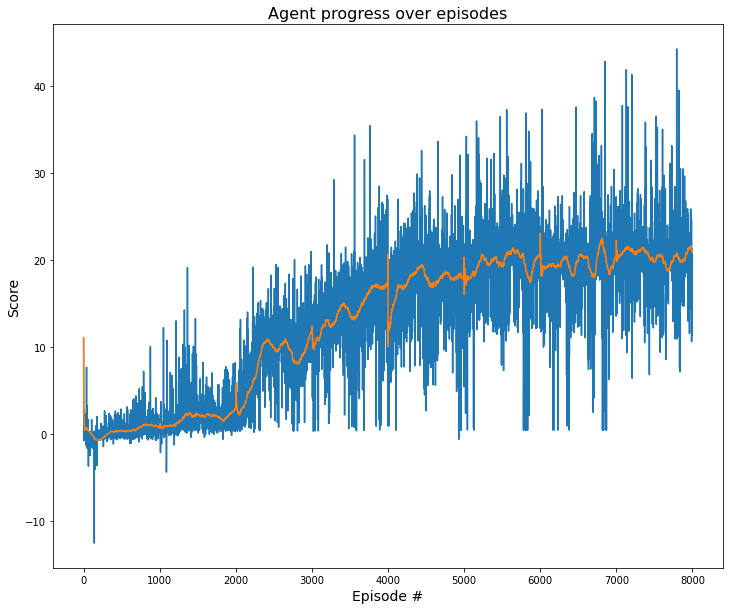

In [28]:
plot_scores(scores, avg_scores)

In [16]:
def play(agent, env, num_agents, n_episodes=5, max_t=1000):
    """play.
    
    Uses the provided agent to play the game.
    There is no training in this code, only playing.
    """
    scores = []
    with tqdm(total=n_episodes) as progress:
        for _ in range(1, n_episodes + 1):
            env.reset()
            ds, _ = env.get_steps(behavior_name)
            states = ds.obs[0]
            num_agents = len(ds)
            score = np.zeros((num_agents, 1))
            agent.reset()
            for _ in range(max_t):
                actions = agent.act(states, clip=False)
                action_tuple = ActionTuple(continuous=actions)
                
                env.set_actions(behavior_name, action_tuple)
                # Move the simulation one step ahead
                env.step()
                # Get the s,a,r,ns tuple
                ds, ts = env.get_steps(behavior_name)
                
                if len(ds) > 0:
                    next_states = ds.obs[0]
                    rewards = ds.reward
                    rewards = np.expand_dims(np.asanyarray(rewards), axis=1)
                    states = next_states
                    score += rewards

                # Break if there are any terminal states
                if len(ts) > 0:
                    agent_ids = [ai for ai in ts]
                    states = states[agent_ids, :]
                    next_states = ts.obs[0]
                    for ai in agent_ids:
                        score[ai] += ts[ai].reward
                    break

            score = np.mean(score)
            scores.append(score)
            progress.set_postfix({"Avg. Score": f"{np.mean(scores):.2f}"})
            progress.update()

In [17]:
play(agent, env, num_agents)

  0%|          | 0/5 [00:00<?, ?it/s]


TypeError: reset() got an unexpected keyword argument 'train_mode'